Project 9: A Data Analysis of my Own

Your name: Chris Levy Remesha Ngabo

Helper: Prof Kumar Parteek

PART 1: READING THE DATA AND PROCESSING IT

1.1 READING THE DATA

In [84]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
#read the dataset and displaying the first 20 rows
df = pd.read_csv('prevalence-of-undernourishment.csv')
df.head(20)

,Entity,Code,Year,Prevalence of undernourishment (% of population)
0,Afghanistan,AFG,2001,47.799999
1,Afghanistan,AFG,2002,45.599998
2,Afghanistan,AFG,2003,40.599998
3,Afghanistan,AFG,2004,38.000000
4,Afghanistan,AFG,2005,36.099998
5,Afghanistan,AFG,2006,33.299999
6,Afghanistan,AFG,2007,29.799999
7,Afghanistan,AFG,2008,26.500000
8,Afghanistan,AFG,2009,24.400000
9,Afghanistan,AFG,2010,23.700001


1.2 LINEAR REGRESSION PROCESS

In [86]:
#create a sub-dataset for the first entity dataframe for one country using .iloc[] 
df_AFG = df.iloc[0:19]
df_AFG

,Entity,Code,Year,Prevalence of undernourishment (% of population)
0,Afghanistan,AFG,2001,47.799999
1,Afghanistan,AFG,2002,45.599998
2,Afghanistan,AFG,2003,40.599998
3,Afghanistan,AFG,2004,38.000000
4,Afghanistan,AFG,2005,36.099998
5,Afghanistan,AFG,2006,33.299999
6,Afghanistan,AFG,2007,29.799999
7,Afghanistan,AFG,2008,26.500000
8,Afghanistan,AFG,2009,24.400000
9,Afghanistan,AFG,2010,23.700001


In [87]:
#Select only the columns you want to keep.
df_reduced_AFG = df_AFG.loc[:, ['Year', 'Prevalence of undernourishment (% of population)']]
#read the first 3 rows
df_reduced_AFG.head(3)

,Year,Prevalence of undernourishment (% of population)
0,2001,47.799999
1,2002,45.599998
2,2003,40.599998


In [88]:
# rename the columns Year" and "Pevalence of undernourishment (% of population)" respectively X and Y
df_reduced_AFG.columns = ['X', 'Y']
# Read the first 3 rows
df_reduced_AFG.head(3)

,X,Y
0,2001,47.799999
1,2002,45.599998
2,2003,40.599998


In [89]:
#X column is set alone by selecting all rows of df_reduced_AFG and all columns except for the last one
X = df_reduced_AFG.iloc[:, :- 1].values
X

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [90]:
#Y column is set alone by selecting all rows of df_reduced_AFG and only the second column. 
Y= df_reduced_AFG.iloc[:, 1].values
Y

array([47.79999924, 45.59999847, 40.59999847, 38.        , 36.09999847,
       33.29999924, 29.79999924, 26.5       , 24.39999962, 23.70000076,
       24.70000076, 28.20000076, 26.29999924, 24.20000076, 21.5       ,
       22.20000076, 23.        , 23.39999962, 25.60000038])

In [91]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets, with 1/2 of the data. The test set is selected randomly.
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size= 1/2) 

In [92]:
# Display one of the variables to see what it looks like just for fun
X_train

array([[2002],
       [2012],
       [2015],
       [2016],
       [2005],
       [2018],
       [2008],
       [2004],
       [2011]])

In [93]:
# Create a DataFrame from X_train and y_train
train_df = pd.DataFrame({'X': X_train.flatten(), 'y': y_train})

# Display the first few rows of the DataFrame
print(train_df.head())

      X          y
0  2002  45.599998
1  2012  28.200001
2  2015  21.500000
3  2016  22.200001
4  2005  36.099998


In [94]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [95]:
# Predicting the Test set results
y_pred = linear_regressor.predict(X_test)
y_pred

array([20.34755415, 31.06652338, 33.74626568, 24.36716761, 41.7854926 ,
       29.72665222, 17.66781185, 35.08613683, 25.70703876, 39.10575029])

In [96]:
# Create a DataFrame from X_train and y_train
train_df = pd.DataFrame({'x': X_train.flatten(), 'y': y_train})

# Display rows of the DataFrame
train_df

,x,y
0,2002,45.599998
1,2012,28.200001
2,2015,21.500000
3,2016,22.200001
4,2005,36.099998
5,2018,23.400000
6,2008,26.500000
7,2004,38.000000
8,2011,24.700001


In [97]:
# Create a DataFrame from X_test, y_test, and y_pred
test_df = pd.DataFrame({'x_test': X_test.flatten(), 'y_test': y_test, 'y_pred': y_pred})

# Display the rows of the DataFrame to see over-predictions and under-predictions
test_df

,x_test,y_test,y_pred
0,2017,23.000000,20.347554
1,2009,24.400000,31.066523
2,2007,29.799999,33.746266
3,2014,24.200001,24.367168
4,2001,47.799999,41.785493
5,2010,23.700001,29.726652
6,2019,25.600000,17.667812
7,2006,33.299999,35.086137
8,2013,26.299999,25.707039
9,2003,40.599998,39.105750


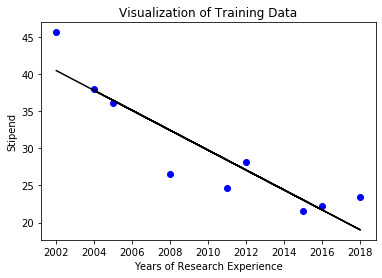

In [98]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.title('Visualization of Training Data')
plt.xlabel('Years of Research Experience')
plt.ylabel('Stipend')
plt.plot(X_train, linear_regressor.predict(X_train), color = 'black')

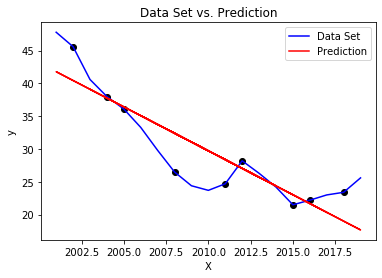

In [99]:
# Plot the data set
plt.plot(X, Y, color='blue', label='Data Set')

#Scatter the training data 
plt.scatter(X_train, y_train, color = 'black')
# Plot the prediction
plt.plot(X_test, y_pred, color='red', label='Prediction')

# Add labels and title to the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Set vs. Prediction')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

2.REPEAT THE PROCESS FOR OTHER COUNTRIES

@Q1, How to find any entity's data from the dataset?

The first country was Afghanistan which was easy to see by just reading the first few columns, Here's a more simple way of getting data for one country.

2.1. Find the names of the countries

In [100]:
# Get the unique values in the 'Entity' column
Entity = df['Entity'].unique()

# Print the unique entities
Entity

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Asia and Pacific', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Eswatini', 'Ethiopia', 'Europe and Central Asia',
       'European Union', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guyana', 'Haiti', 'High income', 'Honduras',
       'Hong Kong', 'Hungary', 'Icelan

2.2 How to find rows for a single region inside the large data frame

In [101]:
# Select only the rows for the country/region of interest (e.g., 'Malawi')
df_MWI = df[df['Entity'] == 'Malawi']
df_MWI

,Entity,Code,Year,Prevalence of undernourishment (% of population)
1862,Malawi,MWI,2001,23.600000
1863,Malawi,MWI,2002,23.799999
1864,Malawi,MWI,2003,24.600000
1865,Malawi,MWI,2004,24.000000
1866,Malawi,MWI,2005,22.500000
1867,Malawi,MWI,2006,20.799999
1868,Malawi,MWI,2007,19.299999
1869,Malawi,MWI,2008,19.000000
1870,Malawi,MWI,2009,17.500000
1871,Malawi,MWI,2010,16.400000


In [102]:
# Get the index of the first row of the Malawi data
df_MWI_start_row = df_MWI.index[0]
df_MWI_start_row

1862

In [103]:
# Get the index of the last row of the Malawi data
df_MWI_last_row = df_MWI.index[-1]
df_MWI_last_row

1880

@Q2 How to improve my code by not repeating the whole process again and again?

3.TO IMPROVE MY CODE, I DECIDED TO WRITE A FUNCTION SO THAT THE USER CAN JUST TYPE THE COUNTRY TO GENERATE A CLEAR FINAL VISUALIZATION CONTAINING THE REAL DATA AND A LINE OF PREDICTION IN ORDER TO READ EASILY THE OVER-PREDICTIONS AND THE UNDER-PREDICTIONS.

In [104]:
def create_linear_regression_plot(country):
    # Opening the data frame
    df = pd.read_csv('prevalence-of-undernourishment.csv')
    
    # Check if the country is in the data frame
    if country not in df['Entity'].unique():
        print(f"{country} is not present in the data frame.")
        return

    # Isolate dataframe for one country using .iloc[] 
    df_country = df.iloc[df.index[df['Entity'] == country][0]:df.index[df['Entity'] == country][0]+19]

    # Select only the columns you want to keep.
    df_reduced_country = df_country.loc[:, ['Year', 'Prevalence of undernourishment (% of population)']]

    # Rename the columns
    df_reduced_country.columns = ['X', 'Y']

    # X is created by selecting all rows of df_reduced_country and all columns except for the last one
    X = df_reduced_country.iloc[:, :-1].values
    y = df_reduced_country.iloc[:, 1].values

    # Split the data into training and testing sets, with 1/2 of the data as the test set selected randomly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/2)

    # Create a DataFrame from X_train and y_train
    train_df = pd.DataFrame({'X': X_train.flatten(), 'y': y_train})

    # Fit the linear regression model to the training data
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train, y_train)

    # Predict the test set results
    y_pred = linear_regressor.predict(X_test)

    # Plot the data set
    plt.plot(X, y, color='blue', label='Data Set')

    # Plot the prediction
    plt.plot(X_test, y_pred, color='red', label='Prediction')

    # Add labels and title to the plot
    plt.xlabel('Year')
    plt.ylabel('Prevalence of undernourishment (% of population)')
    plt.title(f'{country} - Data Set vs. Prediction')

    # Add a legend to the plot
    plt.legend()

    # Show the plot
    plt.show()

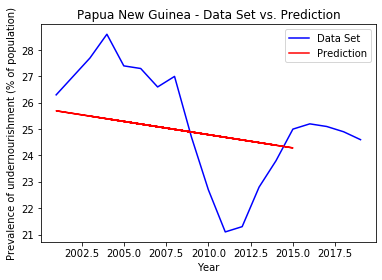

In [105]:
Papua_New_Guinea = create_linear_regression_plot('Papua New Guinea')

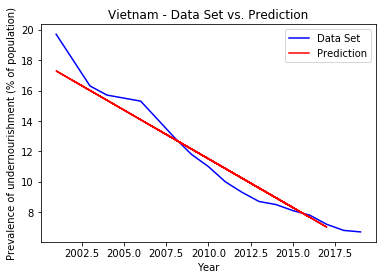

In [106]:
Vietnam = create_linear_regression_plot('Vietnam')

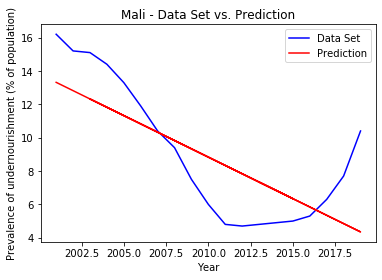

In [107]:
Mali = create_linear_regression_plot('Mali')

In [108]:
DRC = create_linear_regression_plot('DRC')

DRC is not present in the data frame.


Citations and Acknowledgement:
    Max Roser and Hannah Ritchie (2019) - "Hunger and Undernourishment". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/hunger-and-undernourishment' [Online Resource]